# 3. Machine Learning for Classification

We'll use logistic regression to predict churn

## 3.1 Churn prediction project

- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Data preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv -O AB_NYC_2019.csv


zsh:1: command not found: wget


In [4]:
!wget $data -O data-week-3.csv 


zsh:1: command not found: wget


In [5]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [15]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [16]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the Validation Framework

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [20]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [21]:
len(df_full_train), len(df_test)

(5634, 1409)

In [22]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [23]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [26]:
len(y_train), len(y_val), len(y_test)

(4225, 1409, 1409)

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [29]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [30]:
df_full_train = df_full_train.reset_index(drop=True)

In [31]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [32]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [33]:
df_full_train.churn.value_counts(normalize=True)
#Churn Rate = 0.269968

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [34]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [35]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [36]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [38]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [39]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

### Churn rate

In [42]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [43]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [44]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [45]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [46]:
global_churn - churn_female

-0.006855983216553063

In [47]:
global_churn - churn_male

0.006754520462819769

In [48]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [49]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [50]:
churn_yes_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_yes_partner

0.20503330866025166

In [51]:
global_churn - churn_no_partner

-0.05984095297455855

In [52]:
global_churn - churn_yes_partner

0.06493474245795922

### Risk ratio

In [54]:
churn_no_partner / global_churn

1.2216593879412643

In [55]:
churn_yes_partner / global_churn

0.7594724924338315

In [56]:
churn_male / global_churn

0.9749802969838747

In [57]:
churn_female / global_churn

1.0253955354648652

SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender

In [59]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [60]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [61]:
from IPython.display import display

In [62]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [64]:
from sklearn.metrics import mutual_info_score

In [65]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [66]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [67]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [68]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [69]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [70]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [71]:
mi.sort_values(ascending = False)
# Variable with high mutal information score is very important

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns ?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [73]:
df_full_train.tenure.max()

72

In [74]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [75]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [76]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [77]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [78]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [79]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [80]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [81]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [82]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-hot encoding

- Use Scikit-Learn to encode categorical features

In [84]:
from sklearn.feature_extraction import DictVectorizer

In [85]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [86]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [87]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [88]:
dv = DictVectorizer()

In [89]:
dv.fit(dicts)

DictVectorizer()

In [90]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [91]:
dv.transform(dicts)
# Sparse matrix - learn about it if intrested

<100x5 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

In [92]:
print(dv.transform(dicts))

  (0, 2)	1.0
  (0, 3)	1.0
  (1, 0)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (3, 3)	1.0
  (4, 2)	1.0
  (4, 3)	1.0
  (5, 0)	1.0
  (5, 4)	1.0
  (6, 0)	1.0
  (6, 4)	1.0
  (7, 0)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (8, 3)	1.0
  (9, 0)	1.0
  (9, 3)	1.0
  (10, 2)	1.0
  (10, 3)	1.0
  (11, 0)	1.0
  (11, 4)	1.0
  (12, 2)	1.0
  :	:
  (87, 3)	1.0
  (88, 2)	1.0
  (88, 4)	1.0
  (89, 1)	1.0
  (89, 4)	1.0
  (90, 0)	1.0
  (90, 3)	1.0
  (91, 1)	1.0
  (91, 4)	1.0
  (92, 0)	1.0
  (92, 3)	1.0
  (93, 0)	1.0
  (93, 4)	1.0
  (94, 0)	1.0
  (94, 3)	1.0
  (95, 1)	1.0
  (95, 4)	1.0
  (96, 0)	1.0
  (96, 3)	1.0
  (97, 0)	1.0
  (97, 4)	1.0
  (98, 1)	1.0
  (98, 4)	1.0
  (99, 0)	1.0
  (99, 4)	1.0


In [93]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')
dicts

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 17},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 66},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 2},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to

In [94]:
dv = DictVectorizer()

In [95]:
dv.fit(dicts)

DictVectorizer()

In [96]:
#dv.get_feature_names

In [97]:
dv.transform(dicts)
# Sparse matrix - learn about it if intrested

<100x6 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements in Compressed Sparse Row format>

In [98]:
print(dv.transform(dicts))

  (0, 2)	1.0
  (0, 3)	1.0
  (0, 5)	72.0
  (1, 0)	1.0
  (1, 4)	1.0
  (1, 5)	10.0
  (2, 0)	1.0
  (2, 3)	1.0
  (2, 5)	5.0
  (3, 0)	1.0
  (3, 3)	1.0
  (3, 5)	5.0
  (4, 2)	1.0
  (4, 3)	1.0
  (4, 5)	18.0
  (5, 0)	1.0
  (5, 4)	1.0
  (5, 5)	4.0
  (6, 0)	1.0
  (6, 4)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 3)	1.0
  (7, 5)	1.0
  (8, 2)	1.0
  :	:
  (91, 5)	54.0
  (92, 0)	1.0
  (92, 3)	1.0
  (92, 5)	35.0
  (93, 0)	1.0
  (93, 4)	1.0
  (93, 5)	5.0
  (94, 0)	1.0
  (94, 3)	1.0
  (94, 5)	35.0
  (95, 1)	1.0
  (95, 4)	1.0
  (95, 5)	39.0
  (96, 0)	1.0
  (96, 3)	1.0
  (96, 5)	19.0
  (97, 0)	1.0
  (97, 4)	1.0
  (97, 5)	21.0
  (98, 1)	1.0
  (98, 4)	1.0
  (98, 5)	43.0
  (99, 0)	1.0
  (99, 4)	1.0
  (99, 5)	19.0


In [99]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [100]:
dv = DictVectorizer(sparse=False)

In [101]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [102]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [103]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [104]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic Regression

- Binary Classification
- Linear Vs Logistic regression

In [212]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [224]:
z = np.linspace(-8, 8, 51)
z

array([-8.  , -7.68, -7.36, -7.04, -6.72, -6.4 , -6.08, -5.76, -5.44,
       -5.12, -4.8 , -4.48, -4.16, -3.84, -3.52, -3.2 , -2.88, -2.56,
       -2.24, -1.92, -1.6 , -1.28, -0.96, -0.64, -0.32,  0.  ,  0.32,
        0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,  2.88,  3.2 ,
        3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,  5.76,  6.08,
        6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ])

In [226]:
sigmoid(z)

array([3.35350130e-04, 4.61761577e-04, 6.35793968e-04, 8.75359636e-04,
       1.20508423e-03, 1.65880108e-03, 2.28295285e-03, 3.14121328e-03,
       4.32073352e-03, 5.94052220e-03, 8.16257115e-03, 1.12064063e-02,
       1.53677056e-02, 2.10413470e-02, 2.87484959e-02, 3.91657228e-02,
       5.31511364e-02, 7.17575423e-02, 9.62155417e-02, 1.27861566e-01,
       1.67981615e-01, 2.17550224e-01, 2.76878195e-01, 3.45246539e-01,
       4.20675748e-01, 5.00000000e-01, 5.79324252e-01, 6.54753461e-01,
       7.23121805e-01, 7.82449776e-01, 8.32018385e-01, 8.72138434e-01,
       9.03784458e-01, 9.28242458e-01, 9.46848864e-01, 9.60834277e-01,
       9.71251504e-01, 9.78958653e-01, 9.84632294e-01, 9.88793594e-01,
       9.91837429e-01, 9.94059478e-01, 9.95679266e-01, 9.96858787e-01,
       9.97717047e-01, 9.98341199e-01, 9.98794916e-01, 9.99124640e-01,
       9.99364206e-01, 9.99538238e-01, 9.99664650e-01])

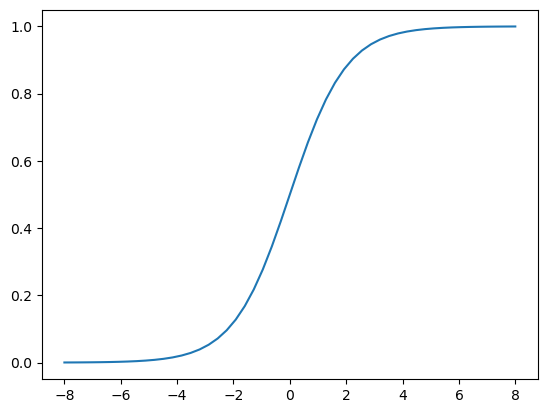

In [228]:
plt.plot(z, sigmoid(z))

In [234]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [236]:
def logistic_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]

    result = sigmoid(score)

    return result

# Fast and easy to compute

## 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [240]:
from sklearn.linear_model import LogisticRegression

In [244]:
#model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
model.coef_

array([[ 4.71652055e-01, -1.71372612e-01, -4.07206253e-01,
        -3.11196746e-02, -7.58071353e-02,  6.20415695e-02,
        -8.96464294e-02, -7.93219500e-02, -3.39246498e-02,
        -7.30021601e-02, -3.29866859e-01,  3.12586478e-01,
        -8.96464294e-02,  3.79488787e-03, -2.54865220e-01,
         1.41473888e-01,  6.46452236e-03,  6.18108359e-02,
        -8.96464294e-02, -7.90912164e-02,  2.60604031e-01,
        -8.96464294e-02, -2.77884411e-01, -2.26830408e-01,
         1.19903598e-01, -1.64297507e-01,  5.73706973e-02,
        -8.58453611e-02, -3.10636731e-02,  6.64965636e-02,
        -5.65143394e-02,  1.41473888e-01, -2.48400698e-01,
         2.12186713e-01, -1.17593319e-01, -8.96464294e-02,
         1.00312939e-01, -6.88051207e-02, -8.96464294e-02,
         5.15247401e-02,  2.08391145e-01, -8.96464294e-02,
        -2.25671525e-01, -6.95481384e-02,  3.71930359e-04]])

In [248]:
model.coef_[0].round(3)

array([ 0.472, -0.171, -0.407, -0.031, -0.076,  0.062, -0.09 , -0.079,
       -0.034, -0.073, -0.33 ,  0.313, -0.09 ,  0.004, -0.255,  0.141,
        0.006,  0.062, -0.09 , -0.079,  0.261, -0.09 , -0.278, -0.227,
        0.12 , -0.164,  0.057, -0.086, -0.031,  0.066, -0.057,  0.141,
       -0.248,  0.212, -0.118, -0.09 ,  0.1  , -0.069, -0.09 ,  0.052,
        0.208, -0.09 , -0.226, -0.07 ,  0.   ])

In [250]:
model.intercept_

array([-0.10829813])

In [252]:
model.intercept_[0]

-0.10829812861544427

In [254]:
model.predict(X_train)   ## Hard predictions as it also have labels

array([0, 1, 1, ..., 1, 0, 1])

In [256]:
model.predict_proba(X_train)   ## soft predictions

array([[0.90521264, 0.09478736],
       [0.3230037 , 0.6769963 ],
       [0.36735291, 0.63264709],
       ...,
       [0.4637139 , 0.5362861 ],
       [0.95685532, 0.04314468],
       [0.30382622, 0.69617378]])

In [262]:
y_pred = model.predict_proba(X_val)[:,1]   ## soft predictions
y_pred

array([0.00937688, 0.20636533, 0.21350024, ..., 0.14016521, 0.79757378,
       0.83465231])

In [266]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [268]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 313, dtype: object

In [272]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [274]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [276]:
(y_val == churn_decision).mean()

0.8019872249822569

In [282]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [284]:
df_pred

,probability,prediction,actual
0,0.009377,0,0
1,0.206365,0,0
2,0.213500,0,0
3,0.544175,1,1
4,0.214825,0,0
...,...,...,...
1404,0.314914,0,0
1405,0.040401,0,1
1406,0.140165,0,0
1407,0.797574,1,1


In [286]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [288]:
df_pred

,probability,prediction,actual,correct
0,0.009377,0,0,True
1,0.206365,0,0,True
2,0.213500,0,0,True
3,0.544175,1,1,True
4,0.214825,0,0,True
...,...,...,...,...
1404,0.314914,0,0,True
1405,0.040401,0,1,False
1406,0.140165,0,0,True
1407,0.797574,1,1,True


In [290]:
df_pred.correct.mean()

0.8019872249822569

In [292]:
df_pred.correct.astype(int).mean()

0.8019872249822569

In [294]:
## Shortcut 
(y_val == churn_decision).mean()

0.8019872249822569

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [297]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [299]:
model.coef_[0].round(3)

array([ 0.472, -0.171, -0.407, -0.031, -0.076,  0.062, -0.09 , -0.079,
       -0.034, -0.073, -0.33 ,  0.313, -0.09 ,  0.004, -0.255,  0.141,
        0.006,  0.062, -0.09 , -0.079,  0.261, -0.09 , -0.278, -0.227,
        0.12 , -0.164,  0.057, -0.086, -0.031,  0.066, -0.057,  0.141,
       -0.248,  0.212, -0.118, -0.09 ,  0.1  , -0.069, -0.09 ,  0.052,
        0.208, -0.09 , -0.226, -0.07 ,  0.   ])

In [305]:
a = [1, 2, 3, 4, 5]
b = 'abcde'
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e')]

In [307]:
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.472,
 'contract=one_year': -0.171,
 'contract=two_year': -0.407,
 'dependents=no': -0.031,
 'dependents=yes': -0.076,
 'deviceprotection=no': 0.062,
 'deviceprotection=no_internet_service': -0.09,
 'deviceprotection=yes': -0.079,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.33,
 'internetservice=fiber_optic': 0.313,
 'internetservice=no': -0.09,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.255,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.006,
 'onlinebackup=no': 0.062,
 'onlinebackup=no_internet_service': -0.09,
 'onlinebackup=yes': -0.079,
 'onlinesecurity=no': 0.261,
 'onlinesecurity=no_internet_service': -0.09,
 'onlinesecurity=yes': -0.278,
 'paperlessbilling=no': -0.227,
 'paperlessbilling=yes': 0.12,
 'partner=no': -0.164,
 'partner=yes': 0.057,
 'paymentmethod=bank_transfer_(automatic)': -0.086,
 'paymentmethod=credit_card_(automatic)': -0.031,
 'paymentmethod=electronic_check': 0.066,
 'pay

In [311]:
small = ['contract', 'tenure', 'monthlycharges']

In [313]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [315]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [319]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [321]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [325]:
X_train_small = dv_small.transform(dicts_train_small)

In [327]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [329]:
w0 = model_small.intercept_[0]
w0

-2.477957595128277

In [333]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [335]:
dict(zip(dv_small.feature_names_, w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [345]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)
# -2.47 -- bias
# two year contract = -0.949
# monthyly charge = 30 * 0.0.27
# tenure = 24 * -0.0.36

-3.473

In [347]:
sigmoid(-3.473)
#sigmoid(_)
# _ is take the ouput of previous cell

0.030090303318277657

In [352]:
-2.47 + (0.97) + 60 * 0.027 + 1 * (-0.036)
# -2.47 -- bias
# two year contract = -0.949
# monthyly charge = 30 * 0.0.27
# tenure = 24 * -0.0.36

0.08399999999999966

In [354]:
sigmoid(0.08399999999999966)

0.5209876607065322

## 3.12 Using the Model

In [363]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [367]:
dict_full_train[:1]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35}]

In [371]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dict_full_train)

In [373]:
y_full_train = df_full_train.churn.values

In [375]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [379]:
dict_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [381]:
X_test = dv.transform(dict_test)

In [383]:
y_pred = model.predict_proba(X_test)[:, 1]

In [385]:
churn_decision = (y_pred >= 0.5)

In [387]:
(churn_decision == y_test).mean()

0.8140525195173882

In [389]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [395]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [397]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [399]:
X_small.shape

(1, 45)

In [403]:
model.predict_proba(X_small)

array([[0.50459333, 0.49540667]])

In [405]:
model.predict_proba(X_small)[0, 1]

0.49540666997820526

In [407]:
y_test[10]

0

In [409]:
customer = dict_test[-1]
X_small = dv.transform([customer])
print(model.predict_proba(X_small))
print(model.predict_proba(X_small)[0, 1])
y_test[-1]

[[0.34363584 0.65636416]]
0.656364161270536


1

## 3.13 Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression


## 3.14 Explore more

More things

- Try to exclude least useful features
  
Use scikit-learn in project of last week

- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients